In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Mall_Customers.csv")

In [3]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = ds.iloc[:,3:].values

In [5]:
from sklearn.cluster import KMeans

In [7]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

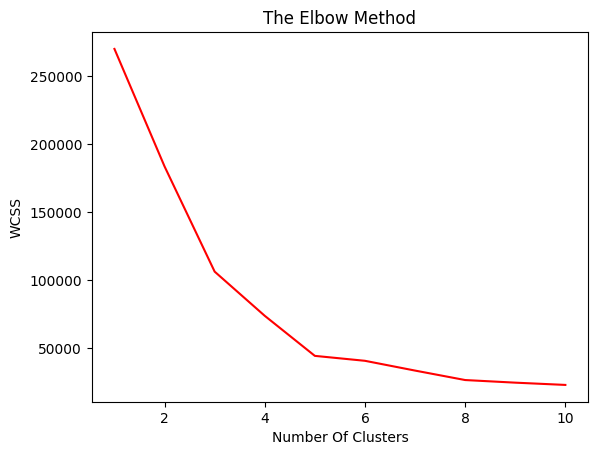

In [9]:
plt.plot(range(1,11),WCSS,color='red')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [12]:
Ypred = kmeans.predict(X) 

In [13]:
Ypred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

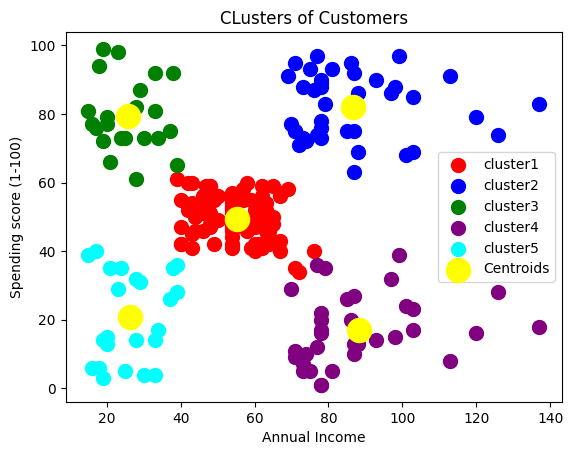

In [27]:
plt.scatter(X[Ypred == 0,0],X[Ypred==0,1],s=100,c='red',label ='cluster1')
plt.scatter(X[Ypred == 1,0],X[Ypred==1,1],s=100,c='blue',label ='cluster2')
plt.scatter(X[Ypred == 2,0],X[Ypred==2,1],s=100,c='green',label ='cluster3')
plt.scatter(X[Ypred == 3,0],X[Ypred==3,1],s=100,c='purple',label ='cluster4')
plt.scatter(X[Ypred == 4,0],X[Ypred==4,1],s=100,c='cyan',label ='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('CLusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()